# Notebook pour projet DCD

## Roadmap

1 - import all metrics in an array of shape *nsample* × *nfeatures*


In [1]:
import sklearn.cluster
import matplotlib.pyplot as plt
import numpy
import pandas
import glob

In [2]:
arraylist = list()
for filename in glob.glob("Metrics/*.tsv"):
    csv_df = pandas.read_csv(filename, delimiter = "\t", index_col=0)
    arraylist.append(csv_df)

In [3]:
np_list = list()
for array in arraylist:
    shape = array.shape
    array_nonacol = array.dropna(axis=0, thresh = shape[1] - 10000)
    array_nona = array_nonacol.dropna(axis = 1)
    np_list.append(array_nona)

In [4]:
# we need all rows and columns names that are not common to all the arrays
columns = set(np_list[0].columns)
rows = set(np_list[0].index)
cols_todel = list()
rows_todel = list()

for array in np_list: # first get all common elements
    rows = rows.intersection(set(array.index))
    columns = columns.intersection(set(array.columns))

for array in np_list: # then get the diff for each array
    rows_todel.append(set(array.index) - rows)
    cols_todel.append(set(array.columns) - columns)

In [5]:
stackable_arrays = list()
for array, rows, cols in zip(np_list, rows_todel, cols_todel):
    temp = array.drop(index=rows)
    stackable_arrays.append(temp.drop(columns = cols))

In [12]:
stacked_arrays = numpy.stack([i.to_numpy() for i in stackable_arrays])
stacked_arrays.shape

(4, 57, 597)

In [28]:
# metrics : species : genes
x = stacked_arrays[:,1,:]
print(x)

[[   39.42          42.66          44.46       ...    42.58
     40.97701149    41.60662824]
 [   42.42144263    46.38686209    52.71795175 ...    50.71868583
     47.42885743    48.04043511]
 [ 6919.         23911.         16142.         ...     0.
   5475.         30121.        ]
 [   38.98          39.16          46.08208955 ...    45.2
     41.45356662    44.79389313]]


In [35]:
sc = sklearn.cluster.KMeans(n_clusters=2).fit(x)
labels = sc.labels_

plt.scatter(x, c=labels)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [43]:
stackable_arrays[0].index

Int64Index([  10020,   10036,   10047,   10090,   10093,   10141,   10160,
              10181,  125878,   13146,  132908, 1737458,  176946,  181119,
             185453, 1868482,  188379,   27679,   28737,   29078,   30538,
              30608,  336983,   35019,   37293,   38654,  419612,   42254,
             482537,   48883,   51338,   55661,  591936,   61621,   61622,
              79684,  885580,    8954,    9031,    9233,    9238,    9531,
               9544,    9555,    9598,    9601,    9685,    9691,    9708,
               9713,    9749,    9785,    9793,    9796,    9798,    9978,
               9986],
           dtype='int64', name='genome reference')

In [41]:
shape = list()
shape.append(stackable_arrays[0].shape[0]) # first get index col size
shape +=[i.shape[1] for i in stackable_arrays] # then get all cols
stacked_array = numpy.zeros(shape)

MemoryError: Unable to allocate 52.7 TiB for an array with shape (57, 597, 597, 597, 597) and data type float64

In [ ]:
shape = numpy.shape(csv_df)
csv_nona_row = csv_df.dropna(axis = 0, thresh = shape[1] - 10000)
csv_nona_col = csv_nona_row.dropna(axis = 1)

In [17]:
x = csv_nona_col.to_numpy()
sc = sklearn.cluster.KMeans(n_clusters=2).fit(x)

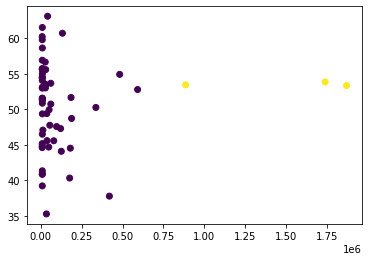

In [18]:
labels = sc.labels_

plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

In [10]:
arraylist[0]

,149685,8992,55255,8399,4233,51510,11214,51726,4649,4201,...,2629,762,64800,83394,441308,9770,4811,6231,10720,Unnamed: 19450
genome reference,,,,,,,,,,,,,,,,,,,,,
10020,NaN,46.674058,38.140000,48.780000,38.740000,42.139219,55.680000,46.720000,69.105027,53.980000,...,NaN,49.480000,42.06,44.592176,39.987163,49.220000,58.049571,46.525253,NaN,NaN
10036,52.420000,52.786885,43.320000,50.460000,48.540000,43.180000,39.640000,46.000000,NaN,53.816327,...,NaN,52.240000,51.10,41.440000,NaN,42.900000,45.960000,45.081247,NaN,NaN
10047,52.900000,50.520000,48.080000,42.340000,40.600000,44.980000,47.520000,43.080000,NaN,52.580000,...,41.50,53.880000,51.18,41.100000,NaN,43.500000,43.620000,NaN,NaN,NaN
10090,50.060000,45.020000,44.560000,43.280000,39.800000,46.620000,38.960000,43.340000,NaN,54.060000,...,NaN,48.100000,49.28,51.220000,NaN,48.240000,46.540000,NaN,35.02,NaN
10093,44.168834,44.760000,44.140000,47.460000,46.060000,47.220000,39.640000,42.943793,52.135076,54.020000,...,NaN,48.360451,50.04,51.530306,NaN,45.000000,47.140000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,NaN,44.183199,38.620000,48.260000,40.660000,42.836812,45.760000,45.180000,NaN,54.940000,...,42.84,63.906628,45.64,35.593220,32.440000,45.144584,51.577549,NaN,NaN,NaN
9796,NaN,55.480000,41.880000,54.920000,40.680000,50.640000,57.940000,45.620000,52.940000,55.060000,...,NaN,59.300000,45.88,46.460000,NaN,50.240000,47.000000,43.800000,34.66,NaN
9798,NaN,44.040000,42.764228,40.306448,40.620000,43.100000,57.940000,47.018533,NaN,54.080589,...,NaN,59.466019,45.92,43.647799,32.120000,38.720000,43.700000,42.660000,NaN,NaN


In [15]:
np_list[0].index

Int64Index([  10020,   10036,   10047,   10090,   10093,   10141,   10160,
              10181,  121530,  125878,   13146,  132908, 1737458,  176946,
             181119,  185453, 1868482,  188379,   27679,   28737,   29078,
              30538,   30608,  336983,   35019,   36300,   37293,   38654,
             419612,   42254,  482537,   48883,   51338,   55661,  591936,
              61621,   61622,   79684,  885580,    8954,    9031,    9233,
               9238,    9531,    9544,    9555,    9598,    9601,    9685,
               9691,    9708,   97097,    9713,    9749,    9785,    9793,
               9796,    9798,    9978,    9986],
           dtype='int64', name='genome reference')

In [27]:
for i in stackable_arrays:
    i.to_numpy()

In [32]:
stacked_array.shape

(57, 3582)